In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
path='/content/gdrive/MyDrive/CA683- Main Assignment/AmazonReviewIntegrated.xlsx'
temp = pd.read_excel(path)

In [3]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135518 entries, 0 to 135517
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   _ - overall         135518 non-null  int64 
 1   _ - verified        135518 non-null  int64 
 2   _ - reviewTime      135518 non-null  object
 3   _ - reviewerID      135518 non-null  object
 4   _ - asin            135518 non-null  object
 5   _ - unixReviewTime  135518 non-null  int64 
 6   _ - reviewerName    135485 non-null  object
 7   _ - summary         135466 non-null  object
 8   _ - reviewText      135420 non-null  object
 9   _ - vote            11423 non-null   object
dtypes: int64(3), object(7)
memory usage: 10.3+ MB


In [4]:
temp['_ - reviewText'] = temp['_ - reviewText'].astype(str).str.lower()
temp['_ - summary'] = temp['_ - summary'].astype(str).str.lower()

In [5]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

In [6]:
temp['_ - reviewText'] = temp['_ - reviewText'].apply(regexp.tokenize)
temp['_ - summary'] = temp['_ - summary'].apply(regexp.tokenize)

In [7]:
temp.head()

,_ - overall,_ - verified,_ - reviewTime,_ - reviewerID,_ - asin,_ - unixReviewTime,_ - reviewerName,_ - summary,_ - reviewText,_ - vote
0,5,1,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,1413763200,Tracy,"[perfect, replacements]","[exactly, what, i, needed]",NaN
1,2,1,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,1411862400,Sonja Lau,"[i, agree, with, the, other, review, the, open...","[i, agree, with, the, other, review, the, open...",3
2,4,0,"08 25, 2014",A2MWC41EW7XL15,7106116521,1408924800,Kathleen,"[my, new, friends]","[love, these, i, am, going, to, order, another...",NaN
3,2,1,"08 24, 2014",A2UH2QQ275NV45,7106116521,1408838400,Jodi Stoner,"[two, stars]","[too, tiny, an, opening]",NaN
4,3,0,"07 27, 2014",A89F3LQADZBS5,7106116521,1406419200,Alexander D.,"[three, stars]",[okay],NaN


In [8]:
temp.to_excel('AmazonReviewTokenized.xlsx', index=False)

### **REMOVING STOPWORDS**

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")
stopwords.extend(["use","make"])

In [11]:
temp['_ - reviewText'] = temp['_ - reviewText'].apply(lambda x: [item for item in x if item not in stopwords])
temp['_ - summary'] = temp['_ - summary'].apply(lambda x: [item for item in x if item not in stopwords])
temp.head(3)

,_ - overall,_ - verified,_ - reviewTime,_ - reviewerID,_ - asin,_ - unixReviewTime,_ - reviewerName,_ - summary,_ - reviewText,_ - vote
0,5,1,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,1413763200,Tracy,"[perfect, replacements]","[exactly, needed]",NaN
1,2,1,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,1411862400,Sonja Lau,"[agree, review, opening]","[agree, review, opening, small, almost, bent, ...",3
2,4,0,"08 25, 2014",A2MWC41EW7XL15,7106116521,1408924800,Kathleen,"[new, friends]","[love, going, order, another, pack, keep, work...",NaN


In [12]:
temp['_ - reviewText'] = temp['_ - reviewText'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
temp['_ - summary'] = temp['_ - summary'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
temp.head(3)

,_ - overall,_ - verified,_ - reviewTime,_ - reviewerID,_ - asin,_ - unixReviewTime,_ - reviewerName,_ - summary,_ - reviewText,_ - vote
0,5,1,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,1413763200,Tracy,perfect replacements,exactly needed,NaN
1,2,1,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,1411862400,Sonja Lau,agree review opening,agree review opening small almost bent hook ex...,3
2,4,0,"08 25, 2014",A2MWC41EW7XL15,7106116521,1408924800,Kathleen,new friends,love going order another pack keep work someon...,NaN


## **LEMMATIZATION**

In [13]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [14]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

In [15]:
temp['_ - reviewText_lem'] = temp['_ - reviewText'].apply(wordnet_lem.lemmatize)
temp['_ - summary_lem'] = temp['_ - summary'].apply(wordnet_lem.lemmatize)

In [16]:
temp.head(3)

,_ - overall,_ - verified,_ - reviewTime,_ - reviewerID,_ - asin,_ - unixReviewTime,_ - reviewerName,_ - summary,_ - reviewText,_ - vote,_ - reviewText_lem,_ - summary_lem
0,5,1,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,1413763200,Tracy,perfect replacements,exactly needed,NaN,exactly needed,perfect replacements
1,2,1,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,1411862400,Sonja Lau,agree review opening,agree review opening small almost bent hook ex...,3,agree review opening small almost bent hook ex...,agree review opening
2,4,0,"08 25, 2014",A2MWC41EW7XL15,7106116521,1408924800,Kathleen,new friends,love going order another pack keep work someon...,NaN,love going order another pack keep work someon...,new friends


In [17]:
all_words_lem = ' '.join([word for word in temp['_ - reviewText_lem']])

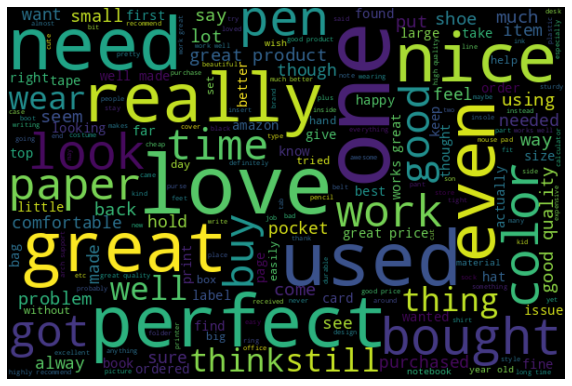

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [19]:
temp.to_excel('AmazonReviewTokenized.xlsx', index=False)